<a href="https://colab.research.google.com/github/SakthiRishikesh/Cybersec_prjcts/blob/main/Log_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pyspark==3.5.1 findspark
!pip install -q elasticsearch==8.9.0 requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.5/395.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Step 1: Install PySpark and findspark
!apt-get install openjdk-11-jdk -qq > /dev/null
!pip install pyspark findspark -q

# Step 2: Set JAVA_HOME (required by Spark)
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

# Step 3: Initialize findspark
import findspark
findspark.init()

# Step 4: Import and create SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CyberLogAnalysis") \
    .master("local[*]") \
    .config("spark.ui.showConsoleProgress", "true") \
    .getOrCreate()

# Step 5: Verify Spark
sc = spark.sparkContext
print("✅ Spark session started successfully!")
print("Spark version:", spark.version)




✅ Spark session started successfully!
Spark version: 3.5.1


In [ ]:
!pip uninstall -y pyspark
!apt-get purge -y openjdk*
!apt-get autoremove -y



Found existing installation: pyspark 3.5.1
Uninstalling pyspark-3.5.1:
  Successfully uninstalled pyspark-3.5.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'openjdk-25-testsupport' for glob 'openjdk*'
Note, selecting 'openjdk-11-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-8-jre-zero' for glob 'openjdk*'
Note, selecting 'openjdk-11-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-21-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-25-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-25-source' for glob 'openjdk*'
Note, selecting 'openjdk-21-demo' for glob 'openjdk*'
Note, selecting 'openjdk-18-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjd

In [ ]:
!apt-get install openjdk-11-jdk -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ca-certificates-java fonts-dejavu-extra java-common libatk-wrapper-java
  libatk-wrapper-java-jni libpcsclite1 libxt-dev openjdk-11-jdk-headless
  openjdk-11-jre openjdk-11-jre-headless
Suggested packages:
  default-jre pcscd libxt-doc openjdk-11-demo openjdk-11-source visualvm
  libnss-mdns fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  ca-certificates-java fonts-dejavu-extra java-common libatk-wrapper-java
  libatk-wrapper-java-jni libpcsclite1 libxt-dev openjdk-11-jdk
  openjdk-11-jdk-headless openjdk-11-jre openjdk-11-jre-headless
0 upgraded, 11 newly installed, 0 to remove and 41 not upgraded.
Need to get 120 MB of archives.
After this operation, 270 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/ma

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += ":/usr/lib/jvm/java-11-openjdk-amd64/bin"


In [ ]:
!pip install -q pyspark==3.5.1 findspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CyberLogAnalysis") \
    .master("local[*]") \
    .config("spark.ui.showConsoleProgress", "true") \
    .getOrCreate()

sc = spark.sparkContext
print("Spark session started successfully!")
print("Spark version:", spark.version)


Spark session started successfully!
Spark version: 3.5.1


In [ ]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
print("Sum:", rdd.reduce(lambda a, b: a + b))


Sum: 15


In [ ]:
# Cell: generate synthetic Apache-like access logs
import random
from datetime import datetime, timedelta, timezone
start = datetime.now(timezone.utc) - timedelta(hours=2)


def generate_sample_logs(path="sample_access.log", n=5000):
    methods = ["GET","POST"]
    urls = ["/","/login","/dashboard","/api/data","/api/auth","/admin","/favicon.ico"]
    ips = ["192.168.1."+str(i) for i in range(2,50)]
    user_agents = ["Mozilla/5.0","curl/7.68.0","python-requests/2.31.0","BadBot/1.0"]
    start = datetime.utcnow() - timedelta(hours=2)
    lines = []
    for i in range(n):
        ip = random.choice(ips + ["10.0.0.1"]*8 + ["203.0.113.9"]*3)  # inject heavy hitters
        t = (start + timedelta(seconds=i)).strftime("%d/%b/%Y:%H:%M:%S +0000")
        method = random.choice(methods)
        # occasionally simulate login attempts, 401s
        url = random.choice(urls + ["/login?user=admin"]*2)
        code = random.choices([200,200,200,404,403,500,401], weights=[70,70,70,5,3,1,6])[0]
        size = random.randint(50,5000)
        ua = random.choice(user_agents + ["sqlmap/1.5"]*1)
        line = f'{ip} - - [{t}] "{method} {url} HTTP/1.1" {code} {size} "-" "{ua}"'
        lines.append(line)
    with open(path,"w") as f:
        f.write("\n".join(lines))
    print(f"Wrote {len(lines)} lines to {path}")

# Run it
generate_sample_logs("sample_access.log", n=8000)


Wrote 8000 lines to sample_access.log


/tmp/ipython-input-2391589846.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  start = datetime.utcnow() - timedelta(hours=2)


In [ ]:
!wc -l sample_access.log
# → 8000 sample_access.log


7999 sample_access.log


In [ ]:
!head -n 3 sample_access.log

192.168.1.2 - - [10/Nov/2025:01:14:30 +0000] "GET /api/auth HTTP/1.1" 200 127 "-" "curl/7.68.0"
192.168.1.41 - - [10/Nov/2025:01:14:31 +0000] "POST /dashboard HTTP/1.1" 200 434 "-" "curl/7.68.0"
192.168.1.36 - - [10/Nov/2025:01:14:32 +0000] "GET /favicon.ico HTTP/1.1" 200 2865 "-" "Mozilla/5.0"


In [ ]:
import re
from pyspark.sql import Row

log_path = "sample_access.log"
log_rdd = sc.textFile(log_path)

pattern = re.compile(r'(\d+\.\d+\.\d+\.\d+) - - \[(.*?)\] "(.*?) (.*?) HTTP/.*" (\d{3}) (\d+) "(.*?)" "(.*?)"')

def parse_line(line):
    m = pattern.match(line)
    if not m:
        return None
    ip, timestamp, method, url, code, size, ref, ua = m.groups()
    return {
        "ip": ip,
        "timestamp": timestamp,
        "method": method,
        "url": url,
        "status": int(code),
        "size": int(size),
        "ua": ua
    }

parsed_rdd = log_rdd.map(parse_line).filter(lambda x: x is not None)
print("Parsed count:", parsed_rdd.count())
print("Sample parsed record:", parsed_rdd.take(2))

Parsed count: 8000
Sample parsed record: [{'ip': '192.168.1.2', 'timestamp': '10/Nov/2025:01:14:30 +0000', 'method': 'GET', 'url': '/api/auth', 'status': 200, 'size': 127, 'ua': 'curl/7.68.0'}, {'ip': '192.168.1.41', 'timestamp': '10/Nov/2025:01:14:31 +0000', 'method': 'POST', 'url': '/dashboard', 'status': 200, 'size': 434, 'ua': 'curl/7.68.0'}]


In [ ]:
rows_rdd = parsed_rdd.map(lambda d: Row(ip=d['ip'], timestamp=d['timestamp'],
                                         method=d['method'], url=d['url'],
                                         status=d['status'], size=d['size'], ua=d['ua']))
df = spark.createDataFrame(rows_rdd)
df.createOrReplaceTempView("access_logs")
print("Schema:")
df.printSchema()
display(df.limit(5).toPandas())


Schema:
root
 |-- ip: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- method: string (nullable = true)
 |-- url: string (nullable = true)
 |-- status: long (nullable = true)
 |-- size: long (nullable = true)
 |-- ua: string (nullable = true)



,ip,timestamp,method,url,status,size,ua
0,192.168.1.2,10/Nov/2025:01:14:30 +0000,GET,/api/auth,200,127,curl/7.68.0
1,192.168.1.41,10/Nov/2025:01:14:31 +0000,POST,/dashboard,200,434,curl/7.68.0
2,192.168.1.36,10/Nov/2025:01:14:32 +0000,GET,/favicon.ico,200,2865,Mozilla/5.0
3,192.168.1.13,10/Nov/2025:01:14:33 +0000,GET,/dashboard,200,4401,python-requests/2.31.0
4,192.168.1.45,10/Nov/2025:01:14:34 +0000,GET,/login?user=admin,200,4851,curl/7.68.0


In [ ]:
# a) Count requests per IP using RDD
ip_counts = parsed_rdd.map(lambda d: (d['ip'], 1)).reduceByKey(lambda a,b: a+b)
top_ips = ip_counts.map(lambda x:(x[1],x[0])).sortByKey(False).take(10)
print("Top IPs (RDD):", top_ips)

# b) Failed auth per IP (401/403)
failed_counts = parsed_rdd.filter(lambda d: d['status'] in (401,403)).map(lambda d: (d['ip'],1)).reduceByKey(lambda a,b:a+b)
print("Top failed-auth IPs:", failed_counts.map(lambda x:(x[1],x[0])).sortByKey(False).take(10))


Top IPs (RDD): [(1138, '10.0.0.1'), (399, '203.0.113.9'), (159, '192.168.1.3'), (157, '192.168.1.30'), (155, '192.168.1.11'), (152, '192.168.1.48'), (151, '192.168.1.13'), (150, '192.168.1.45'), (149, '192.168.1.7'), (146, '192.168.1.8')]
Top failed-auth IPs: [(56, '10.0.0.1'), (14, '203.0.113.9'), (11, '192.168.1.31'), (10, '192.168.1.13'), (10, '192.168.1.20'), (9, '192.168.1.33'), (9, '192.168.1.43'), (9, '192.168.1.6'), (8, '192.168.1.42'), (8, '192.168.1.19')]


In [ ]:
from pyspark.sql.functions import desc
df.groupBy("ip").count().orderBy(desc("count")).show(10, truncate=False)
df.groupBy("url").count().orderBy(desc("count")).show(10, truncate=False)
df.groupBy("status").count().orderBy("status").show()


+------------+-----+
|ip          |count|
+------------+-----+
|10.0.0.1    |1138 |
|203.0.113.9 |399  |
|192.168.1.3 |159  |
|192.168.1.30|157  |
|192.168.1.11|155  |
|192.168.1.48|152  |
|192.168.1.13|151  |
|192.168.1.45|150  |
|192.168.1.7 |149  |
|192.168.1.34|146  |
+------------+-----+
only showing top 10 rows

+-----------------+-----+
|url              |count|
+-----------------+-----+
|/login?user=admin|1797 |
|/api/auth        |939  |
|/login           |924  |
|/admin           |911  |
|/favicon.ico     |900  |
|/api/data        |854  |
|/dashboard       |844  |
|/                |831  |
+-----------------+-----+

+------+-----+
|status|count|
+------+-----+
|   200| 7475|
|   401|  235|
|   403|  100|
|   404|  154|
|   500|   36|
+------+-----+



In [ ]:
# add minute column (use timezone-aware conversion)
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType
from datetime import datetime
def minute_bucket(ts_str):
    dt = datetime.strptime(ts_str.split()[0], "%d/%b/%Y:%H:%M:%S")
    return dt.strftime("%Y-%m-%d %H:%M")
minute_udf = udf(lambda x: minute_bucket(x), StringType())
df2 = df.withColumn("minute", minute_udf(col("timestamp")))
df2.createOrReplaceTempView("access_logs_minute")

FAILED_THRESHOLD = 5
failed_alerts_df = df2.filter(col("status").isin(401,403)).groupBy("ip").count().filter(col("count") >= FAILED_THRESHOLD)
display(failed_alerts_df.orderBy(desc("count")).toPandas())

RATE_THRESHOLD = 100
rate_df = df2.groupBy("ip","minute").count().filter(col("count") > RATE_THRESHOLD)
display(rate_df.orderBy(desc("count")).toPandas())

SCANNER_THRESHOLD = 10
scanner_df = df2.filter(col("status") == 404).groupBy("ip").count().withColumnRenamed("count","num_404s")
display(scanner_df.filter(col("num_404s") >= SCANNER_THRESHOLD).toPandas())


,ip,count
0,10.0.0.1,56
1,203.0.113.9,14
2,192.168.1.31,11
3,192.168.1.20,10
4,192.168.1.13,10
5,192.168.1.6,9
6,192.168.1.43,9
7,192.168.1.33,9
8,192.168.1.42,8
9,192.168.1.21,8


,ip,minute,count


,ip,num_404s
0,203.0.113.9,13
1,10.0.0.1,22


In [ ]:
from pyspark.sql.functions import lit
failed_final = failed_alerts_df.withColumn("alert_type", lit("failed_logins")).withColumnRenamed("count","value")
rate_final = rate_df.withColumn("alert_type", lit("high_rate")).withColumnRenamed("count","value")
scanner_final = scanner_df.filter(col("num_404s") >= SCANNER_THRESHOLD).select(col("ip"), col("num_404s").alias("value")).withColumn("alert_type", lit("404_scanner"))

alerts_df = failed_final.select("ip","value","alert_type").union(rate_final.select("ip","value","alert_type")).union(scanner_final.select("ip","value","alert_type"))
display(alerts_df.toPandas())

alerts_df.coalesce(1).write.mode("overwrite").option("header",True).csv("alerts_output")
print("Saved alerts to 'alerts_output'")


,ip,value,alert_type
0,192.168.1.34,5,failed_logins
1,192.168.1.42,8,failed_logins
2,192.168.1.2,6,failed_logins
3,192.168.1.25,6,failed_logins
4,192.168.1.21,8,failed_logins
5,192.168.1.6,9,failed_logins
6,192.168.1.30,5,failed_logins
7,192.168.1.44,5,failed_logins
8,192.168.1.43,9,failed_logins
9,203.0.113.9,14,failed_logins


Saved alerts to 'alerts_output'


In [ ]:
import os

# List files in the output directory
print(os.listdir("alerts_output"))

# Read and display the content of the generated CSV file
# The exact filename will vary, so we find the first .csv file
csv_files = [f for f in os.listdir("alerts_output") if f.endswith(".csv")]
if csv_files:
    csv_path = os.path.join("alerts_output", csv_files[0])
    with open(csv_path, 'r') as f:
        print("\nContent of the alerts CSV:")
        print(f.read())
else:
    print("\nNo CSV file found in alerts_output directory.")

['_SUCCESS', '._SUCCESS.crc', 'part-00000-0024f4df-31fa-47fe-97d8-c6e73b92e8a2-c000.csv', '.part-00000-0024f4df-31fa-47fe-97d8-c6e73b92e8a2-c000.csv.crc']

Content of the alerts CSV:
ip,value,alert_type
192.168.1.34,5,failed_logins
192.168.1.42,8,failed_logins
192.168.1.2,6,failed_logins
192.168.1.25,6,failed_logins
192.168.1.21,8,failed_logins
192.168.1.6,9,failed_logins
192.168.1.30,5,failed_logins
192.168.1.44,5,failed_logins
192.168.1.43,9,failed_logins
203.0.113.9,14,failed_logins
192.168.1.45,8,failed_logins
10.0.0.1,56,failed_logins
192.168.1.8,6,failed_logins
192.168.1.20,10,failed_logins
192.168.1.36,6,failed_logins
192.168.1.27,7,failed_logins
192.168.1.17,6,failed_logins
192.168.1.31,11,failed_logins
192.168.1.5,6,failed_logins
192.168.1.3,8,failed_logins
192.168.1.19,8,failed_logins
192.168.1.13,10,failed_logins
192.168.1.47,5,failed_logins
192.168.1.23,6,failed_logins
192.168.1.48,5,failed_logins
192.168.1.4,5,failed_logins
192.168.1.16,5,failed_logins
192.168.1.7,5,failed

In [ ]:
df.limit(1000).toPandas().to_csv("sample_df_head.csv", index=False)
print("Wrote sample_df_head.csv")


Wrote sample_df_head.csv


In [ ]:
!ls -lh sample_df_head.csv

-rw-r--r-- 1 root root 76K Nov 10 03:16 sample_df_head.csv


In [ ]:
!wc -l sample_access.log
!ls -lh sample_access.log


7999 sample_access.log
-rw-r--r-- 1 root root 782K Nov 10 03:14 sample_access.log


In [ ]:
parsed_rdd.count()
parsed_rdd.take(1)


[{'ip': '192.168.1.2',
  'timestamp': '10/Nov/2025:01:14:30 +0000',
  'method': 'GET',
  'url': '/api/auth',
  'status': 200,
  'size': 127,
  'ua': 'curl/7.68.0'}]

In [ ]:
df.printSchema()
df.limit(5).toPandas()


root
 |-- ip: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- method: string (nullable = true)
 |-- url: string (nullable = true)
 |-- status: long (nullable = true)
 |-- size: long (nullable = true)
 |-- ua: string (nullable = true)



,ip,timestamp,method,url,status,size,ua
0,192.168.1.2,10/Nov/2025:01:14:30 +0000,GET,/api/auth,200,127,curl/7.68.0
1,192.168.1.41,10/Nov/2025:01:14:31 +0000,POST,/dashboard,200,434,curl/7.68.0
2,192.168.1.36,10/Nov/2025:01:14:32 +0000,GET,/favicon.ico,200,2865,Mozilla/5.0
3,192.168.1.13,10/Nov/2025:01:14:33 +0000,GET,/dashboard,200,4401,python-requests/2.31.0
4,192.168.1.45,10/Nov/2025:01:14:34 +0000,GET,/login?user=admin,200,4851,curl/7.68.0


In [ ]:
sc.parallelize([1,2,3]).reduce(lambda a,b:a+b)


6

In [ ]:
# Colab code cell (bash)
!ls -lh
!wc -l sample_access.log || true
!ls -lh alerts_output || true


total 868K
drwxr-xr-x 2 root root 4.0K Nov 10 03:16 alerts_output
-rw-r--r-- 1 root root 782K Nov 10 03:14 sample_access.log
drwxr-xr-x 1 root root 4.0K Nov  5 14:33 sample_data
-rw-r--r-- 1 root root  76K Nov 10 03:16 sample_df_head.csv
7999 sample_access.log
total 4.0K
-rw-r--r-- 1 root root 963 Nov 10 03:16 part-00000-0024f4df-31fa-47fe-97d8-c6e73b92e8a2-c000.csv
-rw-r--r-- 1 root root   0 Nov 10 03:16 _SUCCESS


In [ ]:
# first 20 lines
!head -n 20 sample_access.log

# last 20 lines
!tail -n 20 sample_access.log

# random sample 10 lines (fast)
!shuf -n 10 sample_access.log


192.168.1.2 - - [10/Nov/2025:01:14:30 +0000] "GET /api/auth HTTP/1.1" 200 127 "-" "curl/7.68.0"
192.168.1.41 - - [10/Nov/2025:01:14:31 +0000] "POST /dashboard HTTP/1.1" 200 434 "-" "curl/7.68.0"
192.168.1.36 - - [10/Nov/2025:01:14:32 +0000] "GET /favicon.ico HTTP/1.1" 200 2865 "-" "Mozilla/5.0"
192.168.1.13 - - [10/Nov/2025:01:14:33 +0000] "GET /dashboard HTTP/1.1" 200 4401 "-" "python-requests/2.31.0"
192.168.1.45 - - [10/Nov/2025:01:14:34 +0000] "GET /login?user=admin HTTP/1.1" 200 4851 "-" "curl/7.68.0"
10.0.0.1 - - [10/Nov/2025:01:14:35 +0000] "POST /login?user=admin HTTP/1.1" 200 3177 "-" "python-requests/2.31.0"
192.168.1.40 - - [10/Nov/2025:01:14:36 +0000] "POST /api/auth HTTP/1.1" 200 1634 "-" "curl/7.68.0"
192.168.1.31 - - [10/Nov/2025:01:14:37 +0000] "POST /login HTTP/1.1" 200 1288 "-" "curl/7.68.0"
192.168.1.10 - - [10/Nov/2025:01:14:38 +0000] "GET /login?user=admin HTTP/1.1" 200 3386 "-" "sqlmap/1.5"
10.0.0.1 - - [10/Nov/2025:01:14:39 +0000] "POST /api/data HTTP/1.1" 200 31

In [ ]:
# Python cell: parse and show 5 parsed records
import re
pattern = re.compile(r'(\d+\.\d+\.\d+\.\d+) - - \[(.*?)\] "(.*?) (.*?) HTTP/.*" (\d{3}) (\d+) "(.*?)" "(.*?)"')

def parse_line_str(line):
    m = pattern.match(line)
    if not m:
        return None
    ip, timestamp, method, url, code, size, ref, ua = m.groups()
    return (ip, timestamp, method, url, int(code), int(size), ua)

rdd = sc.textFile("sample_access.log")
parsed = rdd.map(parse_line_str).filter(lambda x: x is not None)
print("Total parsed lines (RDD count):", parsed.count())
print("Sample parsed rows:")
for row in parsed.take(10):
    print(row)


Total parsed lines (RDD count): 8000
Sample parsed rows:
('192.168.1.2', '10/Nov/2025:01:14:30 +0000', 'GET', '/api/auth', 200, 127, 'curl/7.68.0')
('192.168.1.41', '10/Nov/2025:01:14:31 +0000', 'POST', '/dashboard', 200, 434, 'curl/7.68.0')
('192.168.1.36', '10/Nov/2025:01:14:32 +0000', 'GET', '/favicon.ico', 200, 2865, 'Mozilla/5.0')
('192.168.1.13', '10/Nov/2025:01:14:33 +0000', 'GET', '/dashboard', 200, 4401, 'python-requests/2.31.0')
('192.168.1.45', '10/Nov/2025:01:14:34 +0000', 'GET', '/login?user=admin', 200, 4851, 'curl/7.68.0')
('10.0.0.1', '10/Nov/2025:01:14:35 +0000', 'POST', '/login?user=admin', 200, 3177, 'python-requests/2.31.0')
('192.168.1.40', '10/Nov/2025:01:14:36 +0000', 'POST', '/api/auth', 200, 1634, 'curl/7.68.0')
('192.168.1.31', '10/Nov/2025:01:14:37 +0000', 'POST', '/login', 200, 1288, 'curl/7.68.0')
('192.168.1.10', '10/Nov/2025:01:14:38 +0000', 'GET', '/login?user=admin', 200, 3386, 'sqlmap/1.5')
('10.0.0.1', '10/Nov/2025:01:14:39 +0000', 'POST', '/api/data'

In [ ]:
from pyspark.sql import Row
rows = parsed.map(lambda t: Row(ip=t[0], timestamp=t[1], method=t[2], url=t[3], status=t[4], size=t[5], ua=t[6]))
df = spark.createDataFrame(rows)
df.createOrReplaceTempView("access_logs")
print("Schema:")
df.printSchema()
print("Show 10 rows:")
df.show(10, truncate=False)


Schema:
root
 |-- ip: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- method: string (nullable = true)
 |-- url: string (nullable = true)
 |-- status: long (nullable = true)
 |-- size: long (nullable = true)
 |-- ua: string (nullable = true)

Show 10 rows:
+------------+--------------------------+------+-----------------+------+----+----------------------+
|ip          |timestamp                 |method|url              |status|size|ua                    |
+------------+--------------------------+------+-----------------+------+----+----------------------+
|192.168.1.2 |10/Nov/2025:01:14:30 +0000|GET   |/api/auth        |200   |127 |curl/7.68.0           |
|192.168.1.41|10/Nov/2025:01:14:31 +0000|POST  |/dashboard       |200   |434 |curl/7.68.0           |
|192.168.1.36|10/Nov/2025:01:14:32 +0000|GET   |/favicon.ico     |200   |2865|Mozilla/5.0           |
|192.168.1.13|10/Nov/2025:01:14:33 +0000|GET   |/dashboard       |200   |4401|python-requests/2.31.0|
|192.1

In [ ]:
# convert only first N rows to pandas (avoid OOM)
N=3000  # choose <= memory limit; 2000 is safe for demonstration
pdf = df.limit(N).toPandas()
print("Pandas sample rows:", len(pdf))
pdf.head(10)


Pandas sample rows: 3000


,ip,timestamp,method,url,status,size,ua
0,192.168.1.2,10/Nov/2025:01:14:30 +0000,GET,/api/auth,200,127,curl/7.68.0
1,192.168.1.41,10/Nov/2025:01:14:31 +0000,POST,/dashboard,200,434,curl/7.68.0
2,192.168.1.36,10/Nov/2025:01:14:32 +0000,GET,/favicon.ico,200,2865,Mozilla/5.0
3,192.168.1.13,10/Nov/2025:01:14:33 +0000,GET,/dashboard,200,4401,python-requests/2.31.0
4,192.168.1.45,10/Nov/2025:01:14:34 +0000,GET,/login?user=admin,200,4851,curl/7.68.0
5,10.0.0.1,10/Nov/2025:01:14:35 +0000,POST,/login?user=admin,200,3177,python-requests/2.31.0
6,192.168.1.40,10/Nov/2025:01:14:36 +0000,POST,/api/auth,200,1634,curl/7.68.0
7,192.168.1.31,10/Nov/2025:01:14:37 +0000,POST,/login,200,1288,curl/7.68.0
8,192.168.1.10,10/Nov/2025:01:14:38 +0000,GET,/login?user=admin,200,3386,sqlmap/1.5
9,10.0.0.1,10/Nov/2025:01:14:39 +0000,POST,/api/data,200,3133,curl/7.68.0


In [ ]:
!ls -lh alerts_output
!head -n 20 alerts_output/part-00000-*.csv


total 4.0K
-rw-r--r-- 1 root root 963 Nov 10 03:16 part-00000-0024f4df-31fa-47fe-97d8-c6e73b92e8a2-c000.csv
-rw-r--r-- 1 root root   0 Nov 10 03:16 _SUCCESS
ip,value,alert_type
192.168.1.34,5,failed_logins
192.168.1.42,8,failed_logins
192.168.1.2,6,failed_logins
192.168.1.25,6,failed_logins
192.168.1.21,8,failed_logins
192.168.1.6,9,failed_logins
192.168.1.30,5,failed_logins
192.168.1.44,5,failed_logins
192.168.1.43,9,failed_logins
203.0.113.9,14,failed_logins
192.168.1.45,8,failed_logins
10.0.0.1,56,failed_logins
192.168.1.8,6,failed_logins
192.168.1.20,10,failed_logins
192.168.1.36,6,failed_logins
192.168.1.27,7,failed_logins
192.168.1.17,6,failed_logins
192.168.1.31,11,failed_logins
192.168.1.5,6,failed_logins


In [ ]:
# write an extraction sample to CSV then provide a download link
df.limit(10000).toPandas().to_csv("sample_export.csv", index=False)
print("Wrote sample_export.csv")
# After this, use Colab Files sidebar to download or run:
from google.colab import files
files.download("sample_export.csv")


Wrote sample_export.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Compute top 10 IPs by number of requests
top_ips = df.groupBy("ip").count().orderBy("count", ascending=False).limit(10)

# Convert to Pandas for easy access
top_ips_pd = top_ips.toPandas()

print("Top 10 IPs by request count:")
display(top_ips_pd)


Top 10 IPs by request count:


,ip,count
0,10.0.0.1,1138
1,203.0.113.9,399
2,192.168.1.3,159
3,192.168.1.30,157
4,192.168.1.11,155
5,192.168.1.48,152
6,192.168.1.13,151
7,192.168.1.45,150
8,192.168.1.7,149
9,192.168.1.34,146


Visualizing request frequency for IP: 10.0.0.1


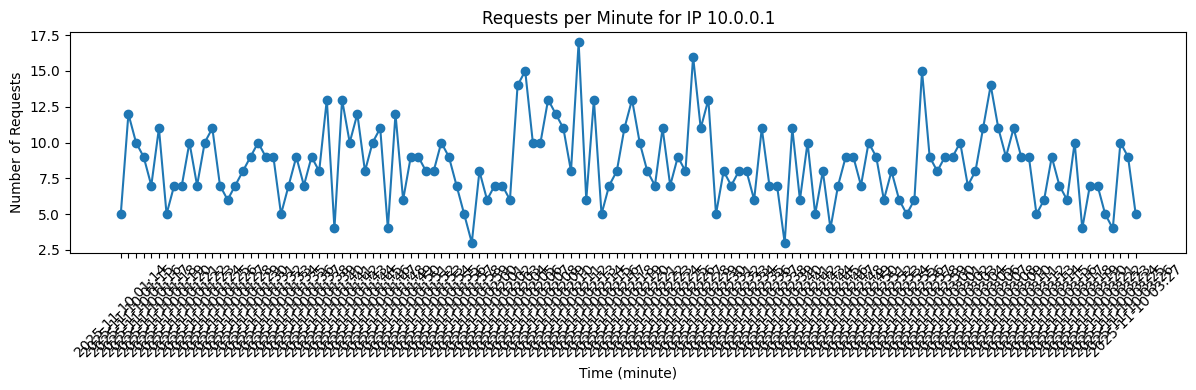

In [ ]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType
from datetime import datetime
import matplotlib.pyplot as plt

# Helper to bucket timestamps to minute level
def minute_bucket(ts):
    try:
        return datetime.strptime(ts.split()[0], "%d/%b/%Y:%H:%M:%S").strftime("%Y-%m-%d %H:%M")
    except:
        return None

minute_udf = udf(lambda x: minute_bucket(x), StringType())

# Add a 'minute' column to the DataFrame
df_min = df.withColumn("minute", minute_udf(col("timestamp")))

# Pick the top IP from the previous top_ips_pd DataFrame
ip0 = top_ips_pd['ip'].iloc[0]
print(f"Visualizing request frequency for IP: {ip0}")

# Group by minute for that IP
ts = (
    df_min.filter(col("ip") == ip0)
    .groupBy("minute")
    .count()
    .orderBy("minute")
    .toPandas()
)

# Plot the frequency
plt.figure(figsize=(12, 4))
plt.plot(ts['minute'], ts['count'], marker='o')
plt.xticks(rotation=45)
plt.title(f"Requests per Minute for IP {ip0}")
plt.xlabel("Time (minute)")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


In [ ]:
pip install streamlit pandas matplotlib plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.4 MB/s eta 0:00:00


In [2]:
from google.colab import auth
auth.authenticate_user()


In [4]:
!git clone https://github.com/SakthiRishikesh/Cybersec_prjcts


fatal: destination path 'Cybersec_prjcts' already exists and is not an empty directory.


In [6]:
!cp sample_access.log
!cp app.py
!cp your_notebook.ipynb


cp: missing destination file operand after 'sample_access.log'
Try 'cp --help' for more information.
cp: missing destination file operand after 'app.py'
Try 'cp --help' for more information.
cp: missing destination file operand after 'your_notebook.ipynb'
Try 'cp --help' for more information.
